In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
dataset = pd.read_csv('Salary_Data.csv') 


In [66]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [67]:
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(strategy="mean")
X[:,[0]] = imputer.fit_transform(X[:,[0]])
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

In [69]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scaled= sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

In [70]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_scaled,Y_train)
Y_pred=regressor.predict(X_test_scaled)

In [71]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
y_pred=regressor.predict(X_test)

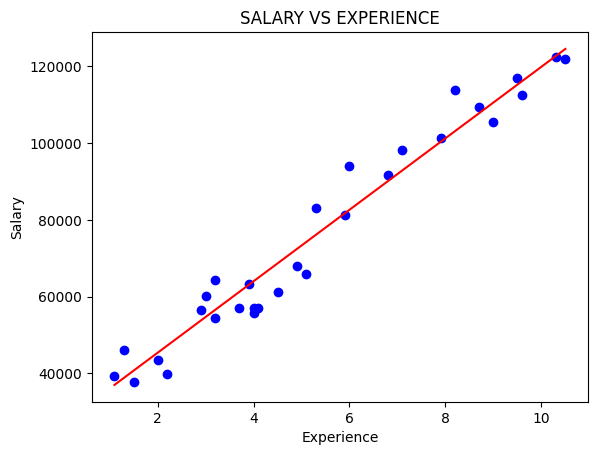

In [72]:
plt.scatter(X,y,color='blue')
plt.plot(X,regressor.predict(X),color='red')
plt.title("SALARY VS EXPERIENCE")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

In [74]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_multi_linear_reg = mean_absolute_error(Y_test,y_pred)
mse_multi_linear_reg = mean_squared_error(Y_test, y_pred)
r2_multi_linear_reg = r2_score(Y_test,y_pred)
adj_r2_multi_linear_reg = 1 - (1 - r2_multi_linear_reg) * (len(Y_test) - 1) / (len(Y_test) - X_test_scaled.shape[1] - 1)

print("Multi Linear Regression Results withOut Scaled:")
print(f"Mean Absolute Error: {mae_multi_linear_reg}")
print(f"Mean Squared Error: {mse_multi_linear_reg}")
print(f"R-Squared: {r2_multi_linear_reg}")
print(f"Adjusted R-Squared: {adj_r2_multi_linear_reg}")

Multi Linear Regression Results withOut Scaled:
Mean Absolute Error: 2446.1723690465055
Mean Squared Error: 12823412.298126549
R-Squared: 0.988169515729126
Adjusted R-Squared: 0.9852118946614076
